# SUPERVISED LEARNING

In [1]:
import Script.Image as Image
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Create training dataset
training = pd.read_csv('CSV/Training.csv')
X = training[['B1','B2','B3','B4','B5','B6','B7','B8','B9','B10','B11','B12','B13']].fillna(0)
Y = training['Content']

In [3]:
# Create validation dataset
filepath1 = "../Sentinel-2/Validation/2020_01_07/L2A_07012020_60.tif"
img_07012020 = Image.make_dataset(filepath1)
t = img_07012020['df'][['B1','B2','B3','B4','B5','B6','B7','B8','B9','B10','B11','B12','B13']].fillna(0)

### LOGISTIC REGRESSION

In [4]:
# Train model
LogReg=LogisticRegression()
LogReg.fit(X, Y);

In [5]:
# Predict model
pred = LogReg.predict(t)

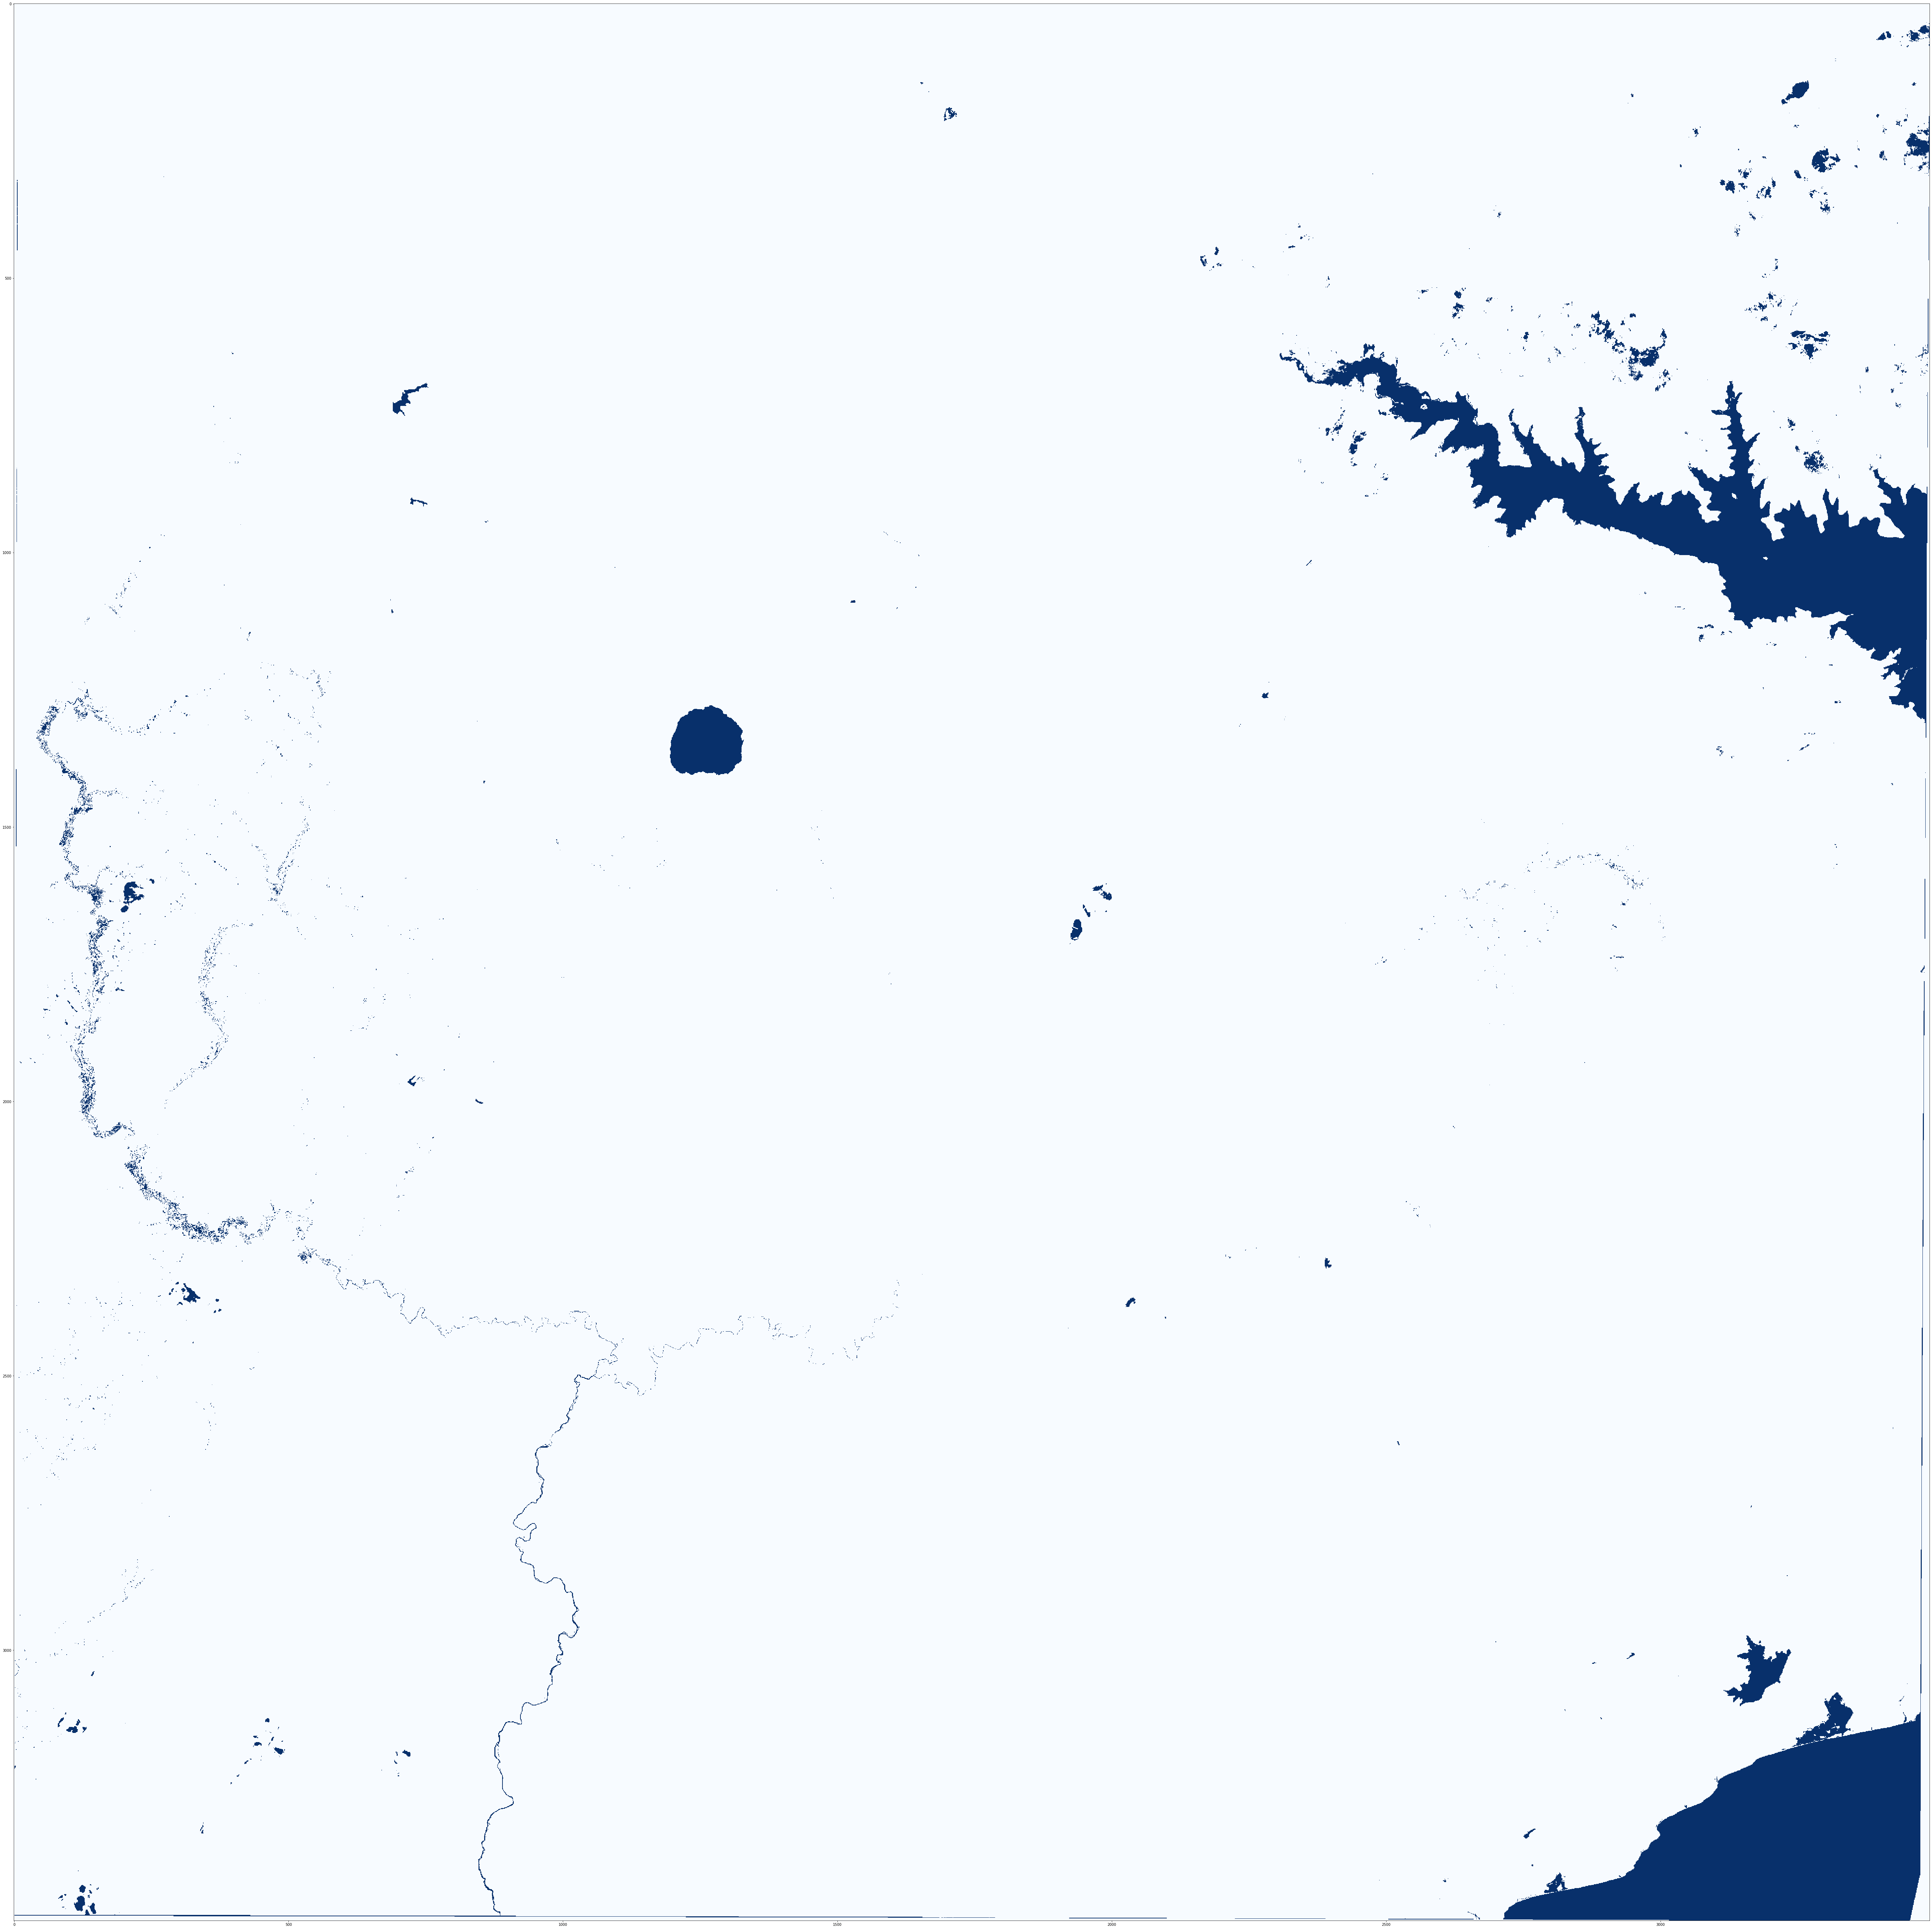

In [6]:
sh = pred.reshape(img_07012020['dim'])
Image.show_pred(sh)

### DECISION TREES

In [7]:
DT = DecisionTreeClassifier()
DT.fit(X, Y);

In [8]:
pred_dt = DT.predict(t)

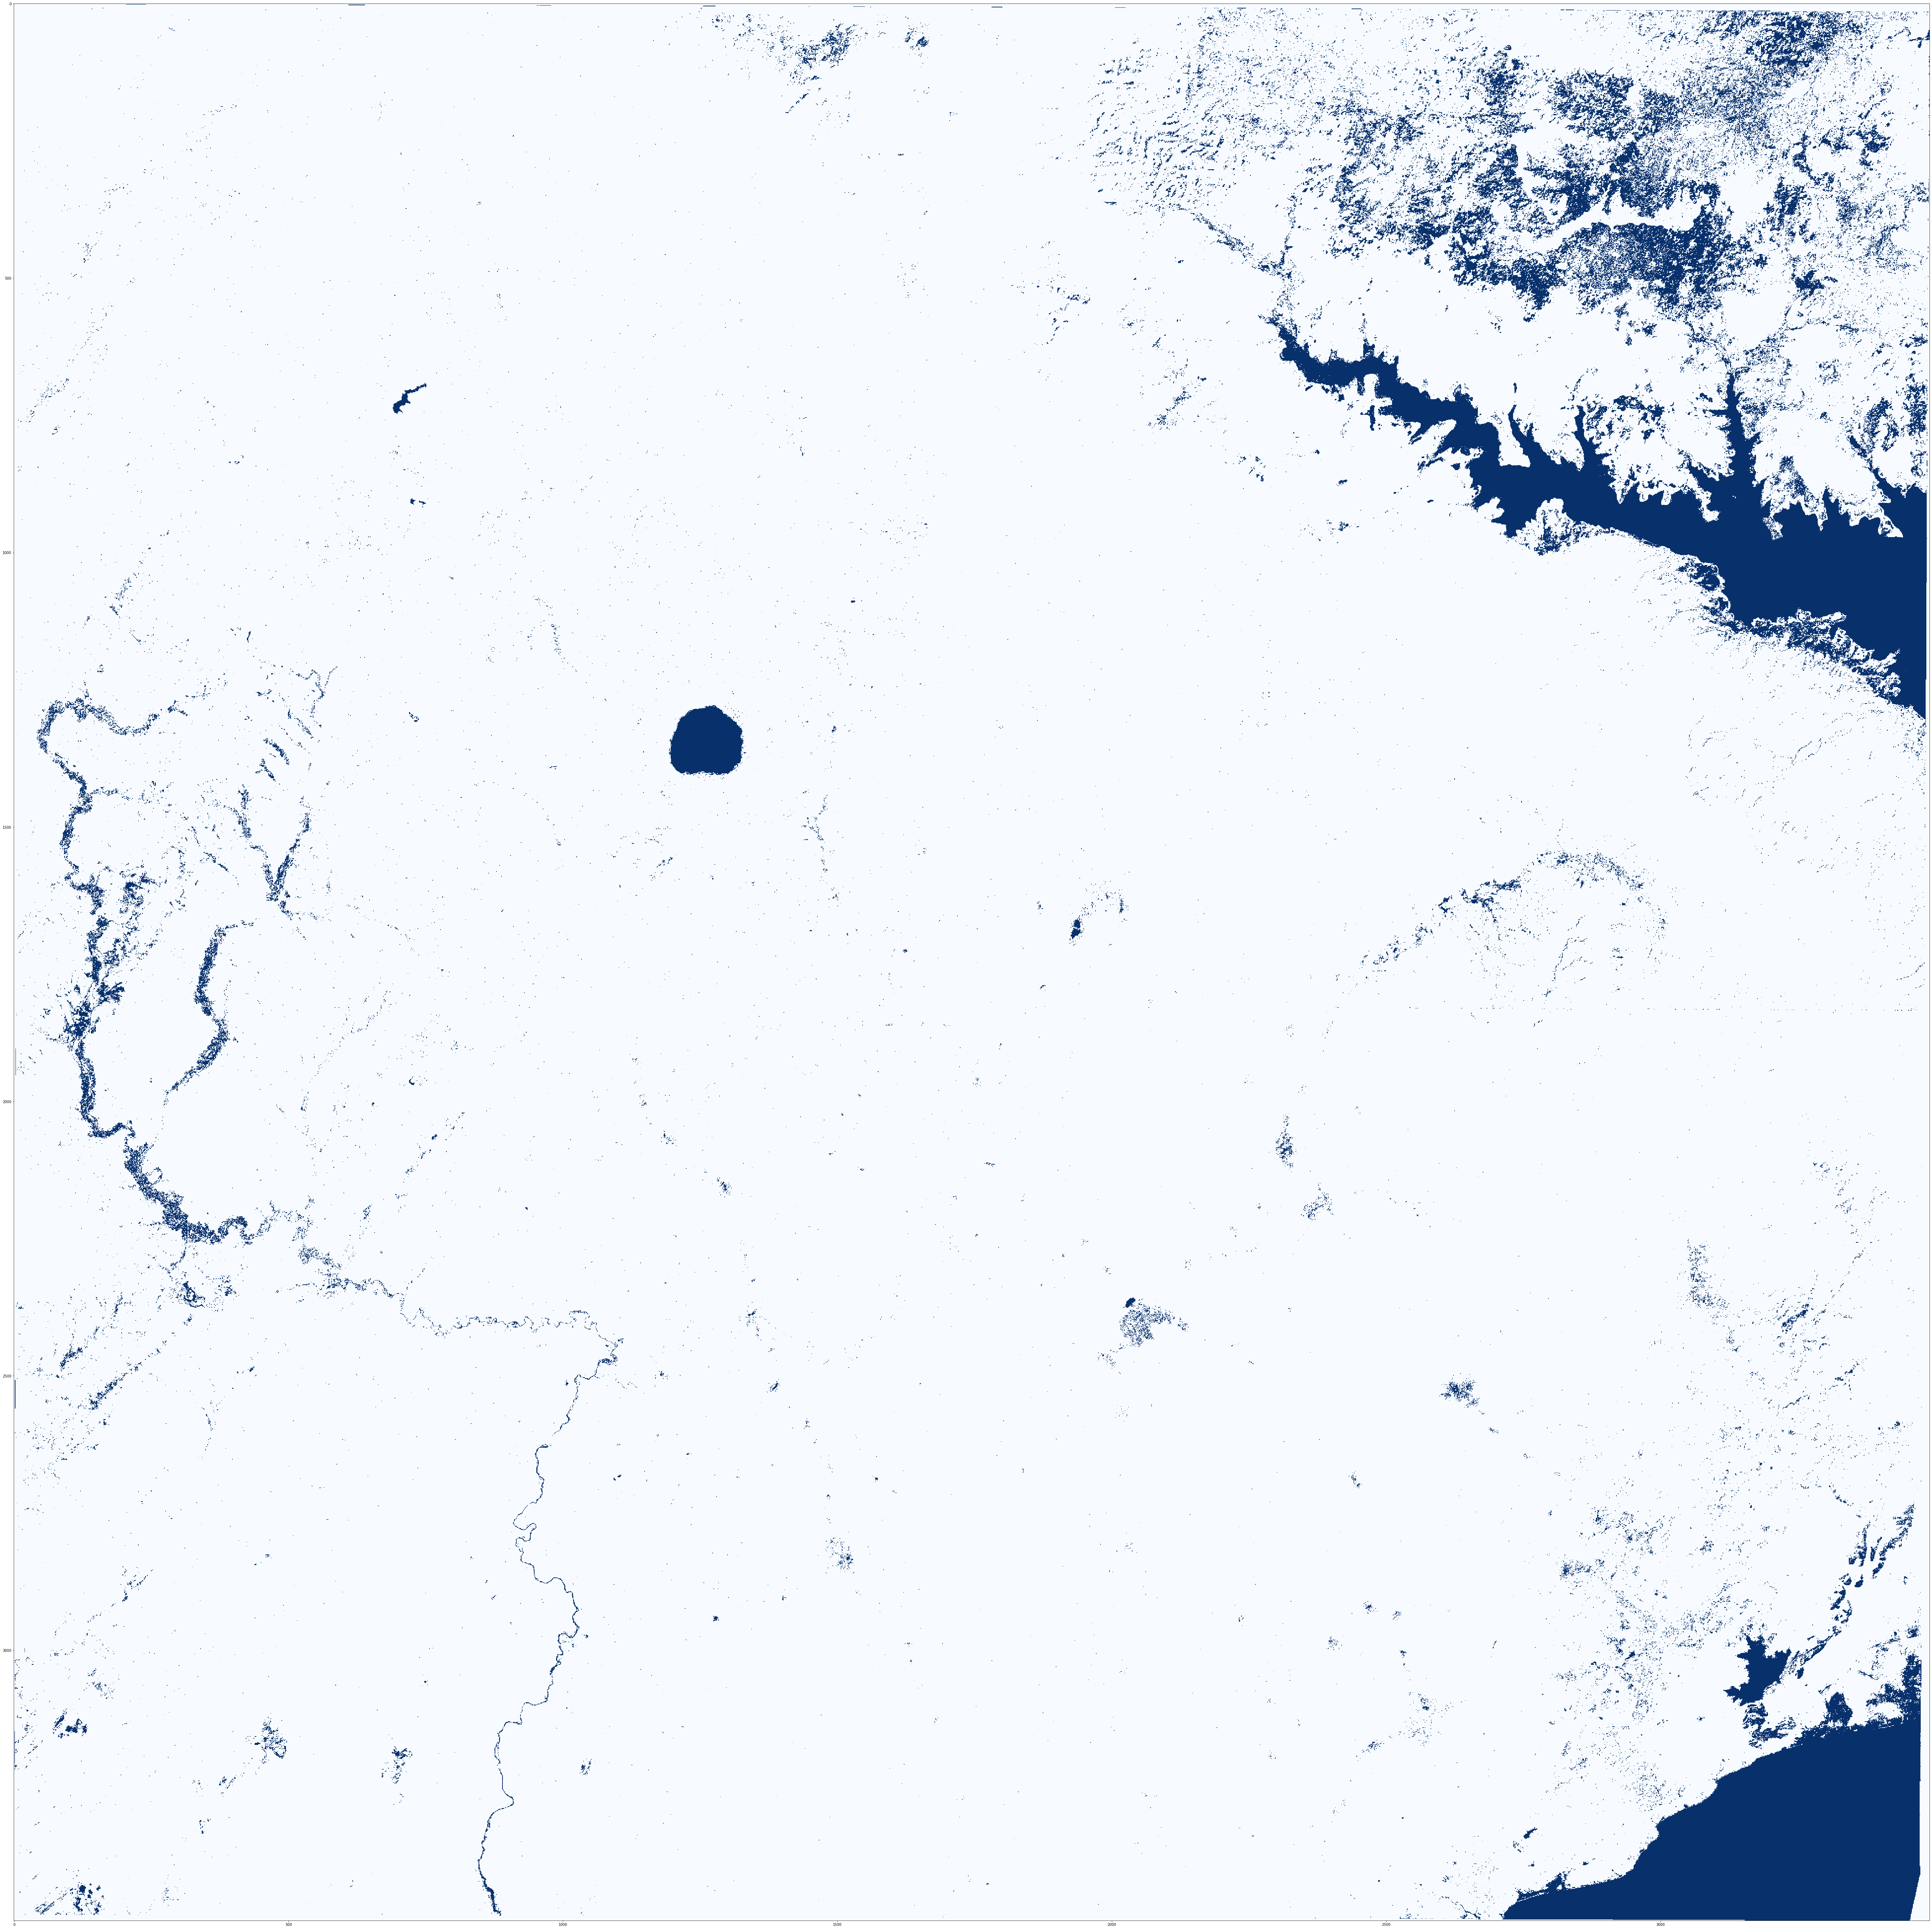

In [9]:
sh = pred_dt.reshape(img_07012020['dim'])
plt.figure(figsize = (100,100))
plt.imshow(sh, cmap = 'Blues')

### RANDOM FOREST TREES

In [12]:
RF = RandomForestClassifier()
RF.fit(X, Y);

In [13]:
pred_rf = RF.predict(t)

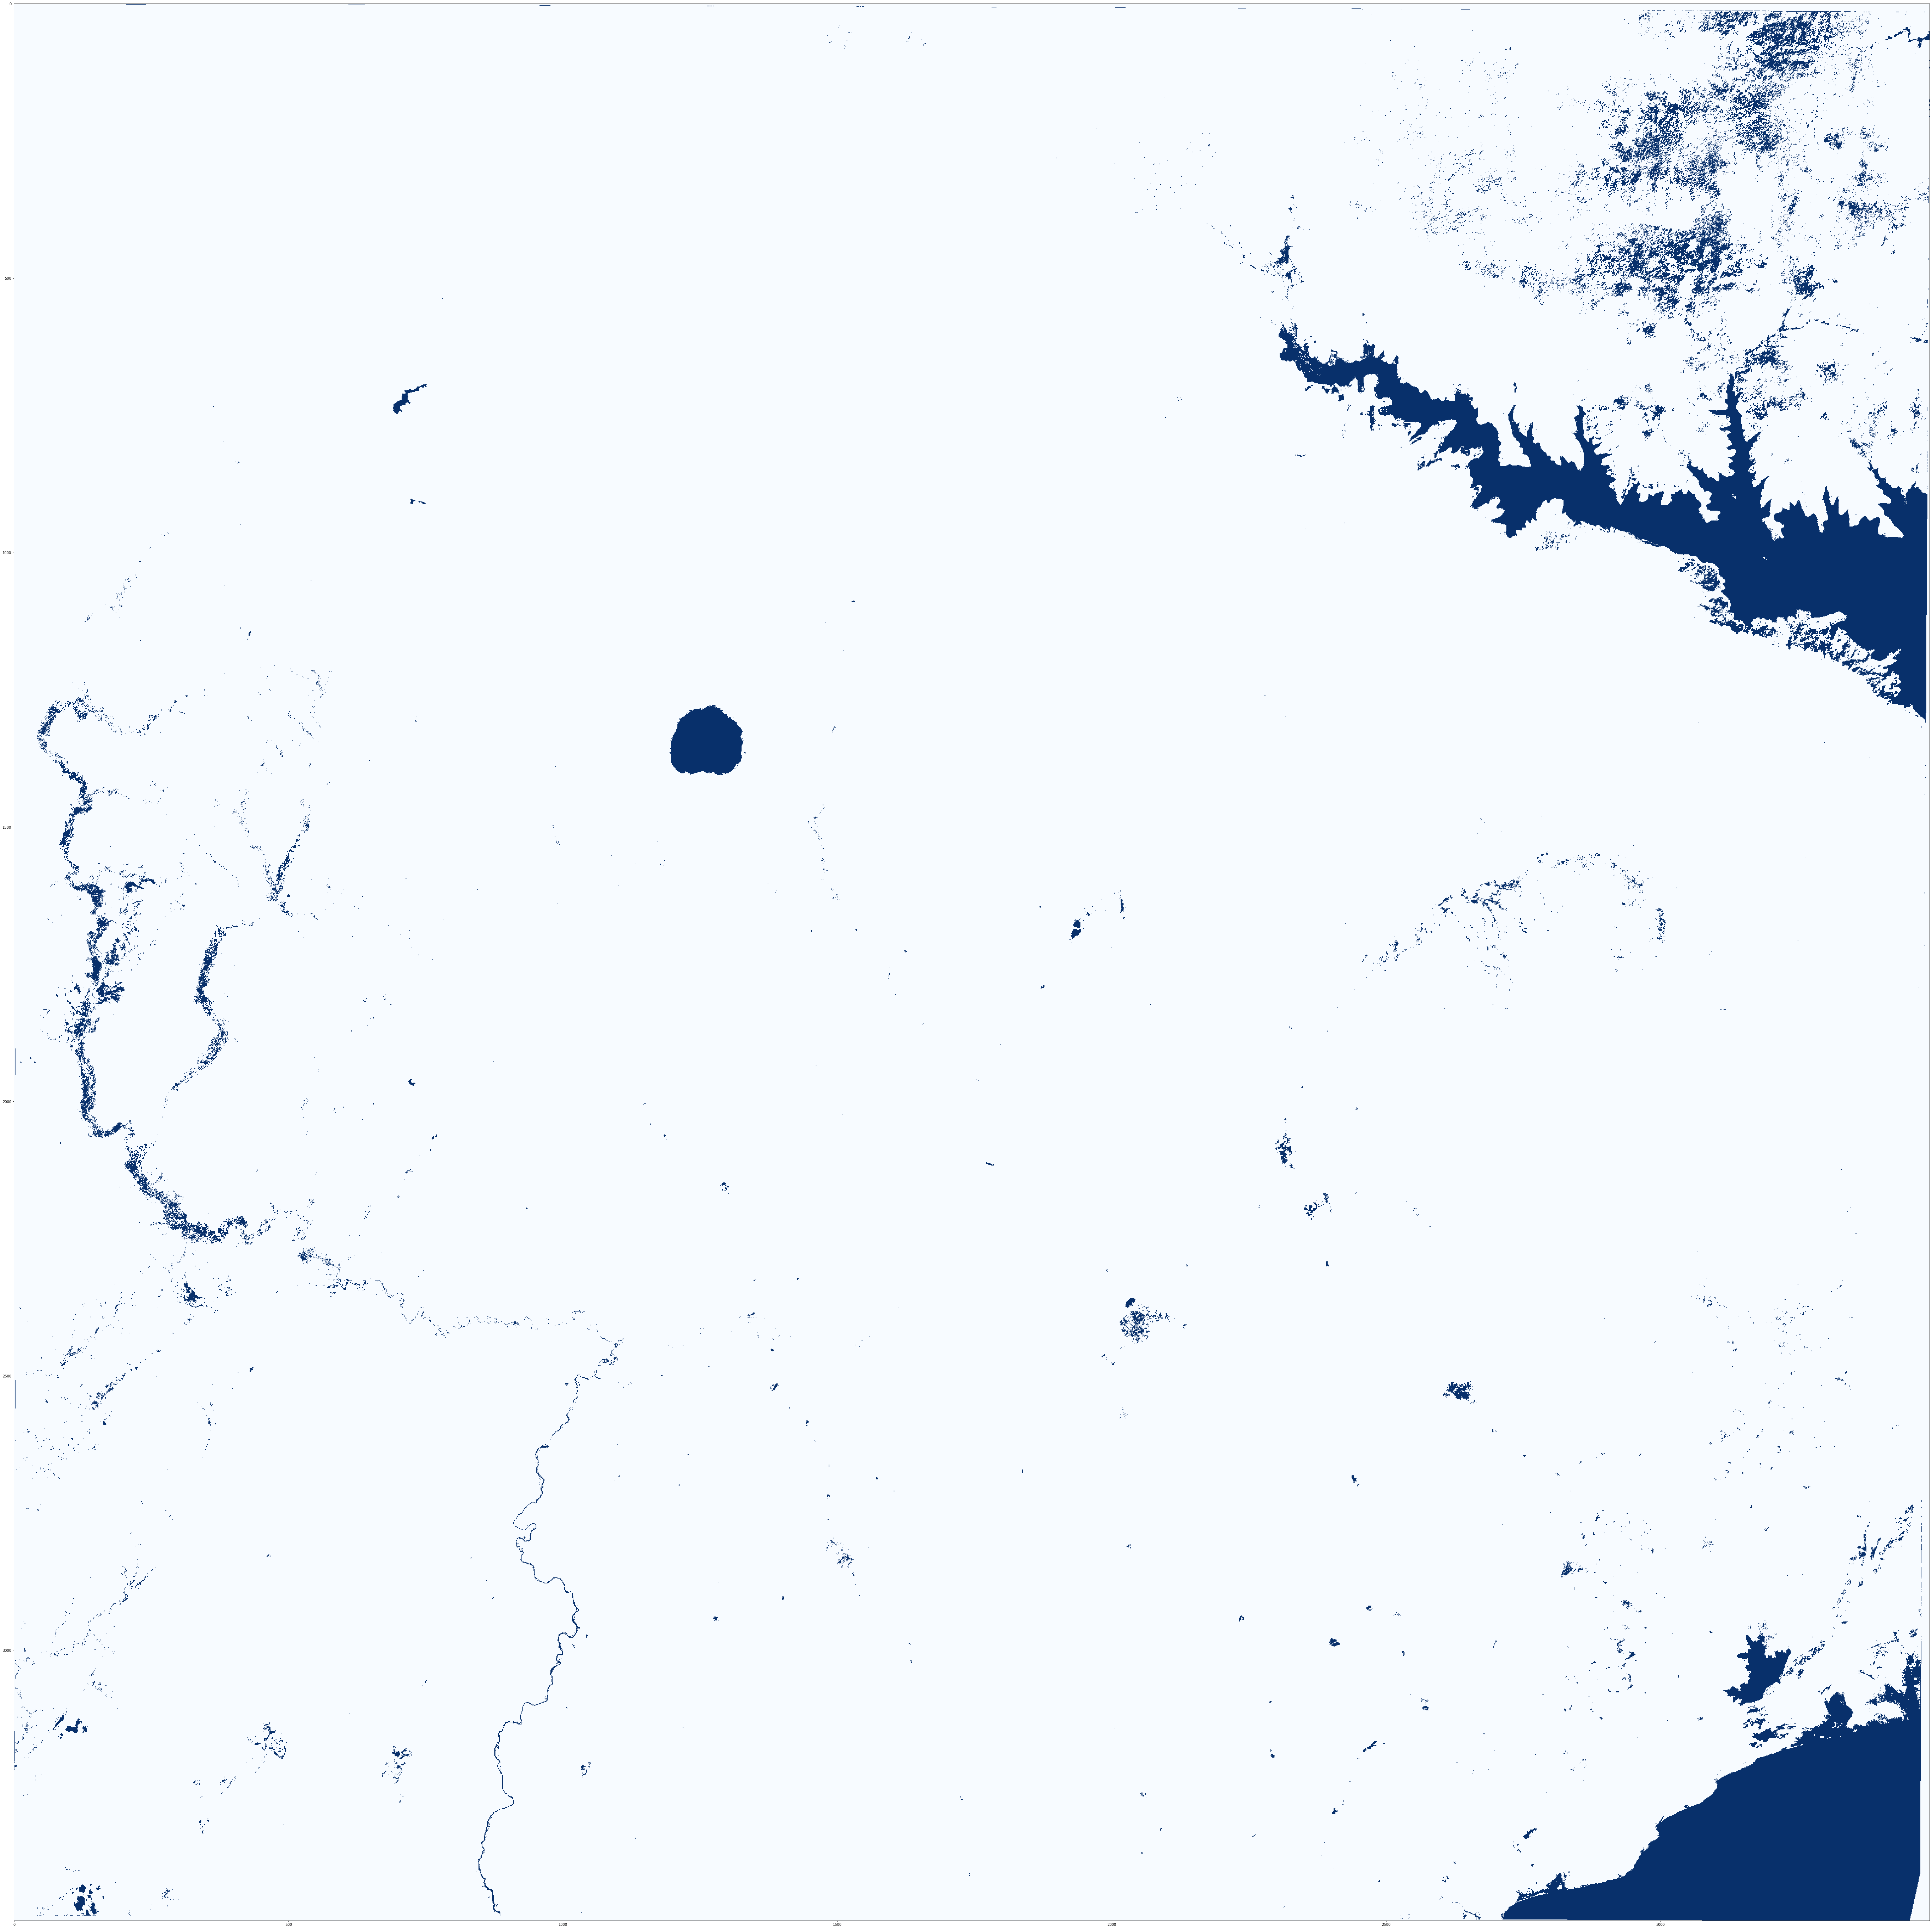

In [19]:
sh = pred_rf.reshape(img_07012020['dim'])
plt.figure(figsize=(100,100))
plt.imshow(sh, cmap = 'Blues')